<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1: Getting Started with PAMI: Introduction, Maintenance, and Usage**

## Installing PAMI Package

In [8]:
!pip install PAMI

zsh:1: command not found: pip


## Download the dataset

In [9]:
!wget -nc https://web-ext.u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv

File ‘Transactional_T10I4D100K.csv’ already there; not retrieving.



## Implementing a pattern mining algorithm

### Syntax



```python
from PAMI.theoreticalModel.patternType import algorithm as alg
# Initialization
obj = alg.algorithm(inputFile, constraints, sep='\t')

# Mining the patterns
obj.mine()

# Save the discovered patterns
obj.save(outputFileName)

# Print the results
print('Total number of patterns: ' + \
       str(len(obj.getPatterns())))  
print('Runtime: ' + str(obj.getRuntime()))  
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1: Executing the Apriori algorithm

In [10]:
import PAMI.frequentPattern.basic.Apriori as alg

# Create an Apriori object
obj = alg.Apriori(iFile = 'Transactional_T10I4D100K.csv',
    minSup = 500)
# Run the mining process
obj.mine()
# Save the frequent patterns to an output file
obj.save(oFile = 'patterns.txt')
# Print the results
print('Total number of patterns: ' +
       str(len(obj.getPatterns())))
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Frequent patterns were generated successfully using Apriori algorithm 
Total number of patterns: 1072
Runtime: 4.130907297134399
Memory (RSS): 79478784
Memory (USS): 63422464


In [11]:
from PAMI.frequentPattern.basic import Apriori

## Evaluating Multiple Pattern Mining Algorithms

### Syntax

```python
from PAMI.frequentPattern.basic import Apriori as alg1
from PAMI.frequentPattern.basic import FPGrowth  as alg2
import pandas as pd

minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]

resultDF = pd.DataFrame(columns=['algorithm', 'minSup','patterns', 'runtime', 'memoryRSS', 'memoryUSS'])


for minSupCount in minimumSupportCountList:
    obj = alg1.Apriori(iFile='Transactional_T10I4D100K.csv', minSup=minSupCount,sep='\t')
    obj.mine()
    resultDF.loc[resultDF.shape[0]]=['Apriori', minSupCount,len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS(), obj.getMemoryUSS()]

for minSupCount in minimumSupportCountList:
    obj = alg2.FPGrowth(iFile='Transactional_T10I4D100K.csv', minSup=minSupCount, sep='\t')
    obj.mine()
    resultDF.loc[resultDF.shape[0]]=['FPgrowth', minSupCount,len(obj.getPatterns()), obj.getRuntime(),obj.getMemoryRSS(), obj.getMemoryUSS()]

resultDF #print dataframe
```



### Example 2: Evaluating Apriori and FP-growth algorithms

In [12]:
from PAMI.frequentPattern.basic import Apriori as alg1
from PAMI.frequentPattern.basic import FPGrowth  as alg2
from PAMI.extras.graph import Results2Latex as res
import pandas as pd

minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]

resultDF = pd.DataFrame(columns=['algorithm', 'minSup','patterns', 'runtime', 'memoryRSS', 'memoryUSS'])


for minSupCount in minimumSupportCountList:
    obj = alg1.Apriori(iFile='Transactional_T10I4D100K.csv', minSup=minSupCount,sep='\t')
    obj.mine()
    resultDF.loc[resultDF.shape[0]]=['Apriori', minSupCount,len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS(), obj.getMemoryUSS()]

for minSupCount in minimumSupportCountList:
    obj = alg2.FPGrowth(iFile='Transactional_T10I4D100K.csv', minSup=minSupCount, sep='\t')
    obj.mine()
    resultDF.loc[resultDF.shape[0]]=['FPgrowth', minSupCount,len(obj.getPatterns()), obj.getRuntime(),obj.getMemoryRSS(), obj.getMemoryUSS()]

resultDF #print dataframe

Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


,algorithm,minSup,patterns,runtime,memoryRSS,memoryUSS
0,Apriori,1000,385,2.294293,281985024,227950592
1,Apriori,1500,237,1.471497,335609856,274104320
2,Apriori,2000,155,0.897501,308101120,259850240
3,Apriori,2500,107,0.615630,321454080,265535488
4,Apriori,3000,60,0.465261,350437376,274907136
5,FPgrowth,1000,385,1.523555,422543360,366100480
6,FPgrowth,1500,237,1.238279,398819328,327565312
7,FPgrowth,2000,155,0.882168,354041856,276299776
8,FPgrowth,2500,107,0.615134,341590016,263225344
9,FPgrowth,3000,60,0.423950,336396288,258031616


## Plotting the results

### Syntax


```python
from PAMI.extras.graph import PlotLineGraphs4DataFrame as dif
# Pass the result data frame to the class
obj = dif.PlotLineGraphs4DataFrame(resultDF)
# Plotting the graphs
obj.plot(result=resultDF, xaxis='constraint', yaxis='patterns', label='algorithm')
obj.plot(result=resultDF, xaxis='constraint', yaxis='runtime', label='algorithm')
obj.plot(result=resultDF, xaxis='constraint', yaxis='memoryRSS', label='algorithm')
obj.plot(result=resultDF, xaxis='constraint', yaxis='memoryUSS', label='algorithm')
#saving the graphs' results
obj.save(result=resultDF, xaxis='constraint', yaxis='patterns', label='algorithm',oFile='patterns.jpg')
obj.save(result=resultDF, xaxis='constraint', yaxis='runtime', label='algorithm',oFile='runtime.jpg')
obj.save(result=resultDF, xaxis='constraint', yaxis='memoryRSS', label='algorithm',oFile='memoryRSS.jpg')
obj.save(result=resultDF, xaxis='constraint', yaxis='memoryUSS', label='algorithm',oFile='memoryUSS.jpg')
```



### Example 3: Displaying and Saving the Evaluation Results

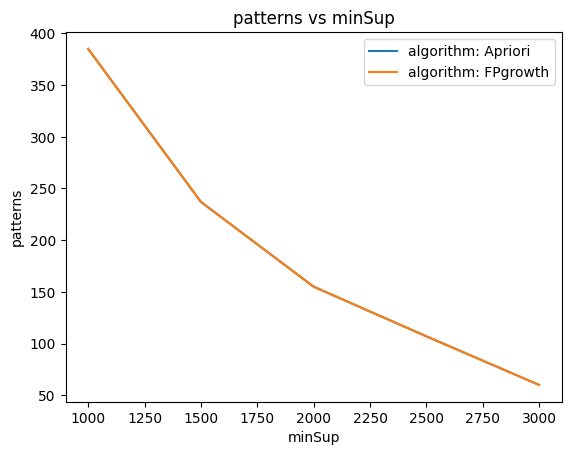

Graph for patterns vs minSup is successfully generated!


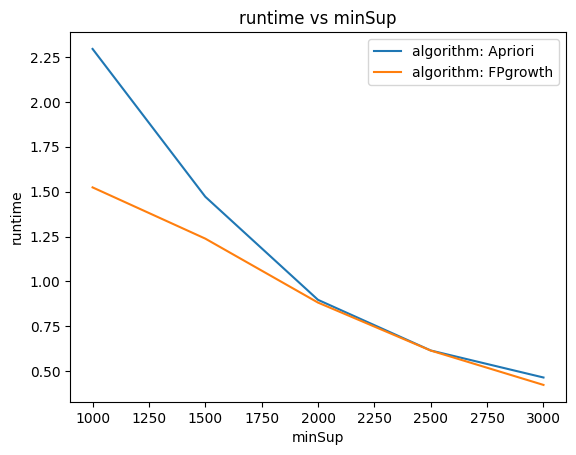

Graph for runtime vs minSup is successfully generated!


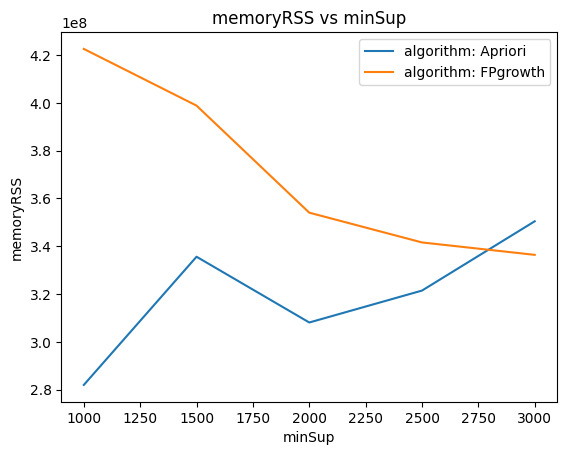

Graph for memoryRSS vs minSup is successfully generated!


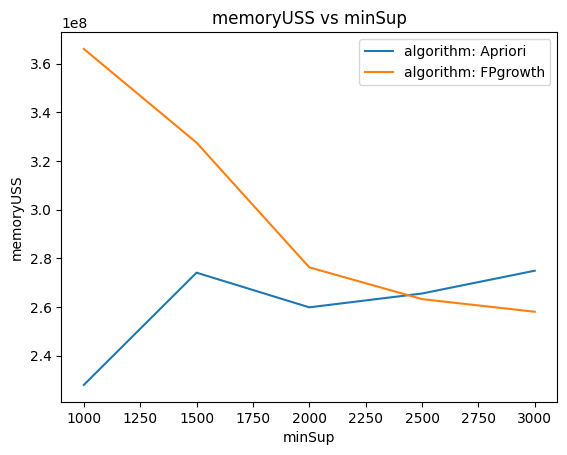

Graph for memoryUSS vs minSup is successfully generated!
Graph saved as patterns.jpg!
Graph saved as runtime.jpg!
Graph saved as memoryRSS.jpg!
Graph saved as memoryUSS.jpg!


In [13]:
from PAMI.extras.graph import PlotLineGraphs4DataFrame as dif
# Pass the result data frame to the class
obj = dif.PlotLineGraphs4DataFrame(resultDF)
# Draw the graphs
obj.plot(result=resultDF, xaxis='minSup', yaxis='patterns', label='algorithm')
obj.plot(result=resultDF, xaxis='minSup', yaxis='runtime', label='algorithm')
obj.plot(result=resultDF, xaxis='minSup', yaxis='memoryRSS', label='algorithm')
obj.plot(result=resultDF, xaxis='minSup', yaxis='memoryUSS', label='algorithm')
#saving the graphs' results
obj.save(result=resultDF, xaxis='minSup', yaxis='patterns', label='algorithm',oFile='patterns.jpg')
obj.save(result=resultDF, xaxis='minSup', yaxis='runtime', label='algorithm',oFile='runtime.jpg')
obj.save(result=resultDF, xaxis='minSup', yaxis='memoryRSS', label='algorithm',oFile='memoryRSS.jpg')
obj.save(result=resultDF, xaxis='minSup', yaxis='memoryUSS', label='algorithm',oFile='memoryUSS.jpg')

## Creating the Latex file containing the results

### Syntax



```python
from PAMI.extras.graph import Results2Latex as alg
#Initailize
obj = alg.Results2Latex()

#Printing the latex code
obj.print(result=resultDF,xaxis='xLabel',yaxis='yLabel',\
    label='algorithm')  
#Saving the latex code in a file
obj.save(result=resultDF,xaxis='xLabel',yaxis='yLabel',\
    label='algorithm',oFile='outputFileName.txt')
```



### Example 4: Storing Comparision results in Latex files

In [14]:
from PAMI.extras.graph import Results2Latex as alg

obj = res.Results2Latex()
#Printing the latex code on the terminal
obj.print(result=resultDF, xaxis='minSup', yaxis='patterns',label='algorithm')
obj.print(result=resultDF, xaxis='minSup', yaxis='runtime', label='algorithm')
obj.print(result=resultDF, xaxis='minSup', yaxis='memoryRSS',label='algorithm')
obj.print(result=resultDF, xaxis='minSup', yaxis='memoryUSS', label='algorithm')
#save the latex code in a file
obj.save(result=resultDF, xaxis='minSup', yaxis='patterns', label='algorithm', oFile='patterns.txt')
obj.save(result=resultDF, xaxis='minSup', yaxis='runtime', label='algorithm', oFile='runtime.txt')
obj.save(result=resultDF, xaxis='minSup', yaxis='memoryRSS', label='algorithm', oFile='memoryRSS.txt')
# obj.save(result=resultDF, xaxis='minSup', yaxis='memoryUSS', label='algorithm', oFile='memoryUSS.txt')

\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{patterns}},
	xmin=1000, xmax=3000,]
\addplot+  [red]
	coordinates {
(1000,385)
(1500,237)
(2000,155)
(2500,107)
(3000,60)
	};   \addlegendentry{Apriori}
\addplot+  [blue]
	coordinates {
(1000,385)
(1500,237)
(2000,155)
(2500,107)
(3000,60)
	};   \addlegendentry{FPgrowth}
\end{axis}
\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{runtime}},
	xmin=1000, xmax=3000,]
\addplot+  [red]
	coordinates {
(1000,2.29429292678833)
(1500,1.4714970588684082)
(2000,0.8975009918212891)
(2500,0.6156301498413086)
(3000,0.46526098251342773)
	};   \addlegendentry{Apriori}
\addplot+  [blue]
	coordinates {
(1000,1.523554801940918)
(1500,1.238278865814209)
(2000,0.8821680545806885)
(2500,0.6151340007781982)
(3000,0.4239499568939209)
	};   \addlegendentry{FPgrowth}
\end{axis}
\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{memoryRSS}},
	xmin=1000, xmax=3000,]
\addplot+  [red]
	coordinates {
(1000,281985024)
(1500,335609856)
(2000,308101120)
(250